In [1]:
# Import all the things
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium

# Make in-line plots as needed
%matplotlib inline

In [2]:
# Read in the master table created in the first notebook
df_beers = pd.read_csv('./data/df_beers.csv')

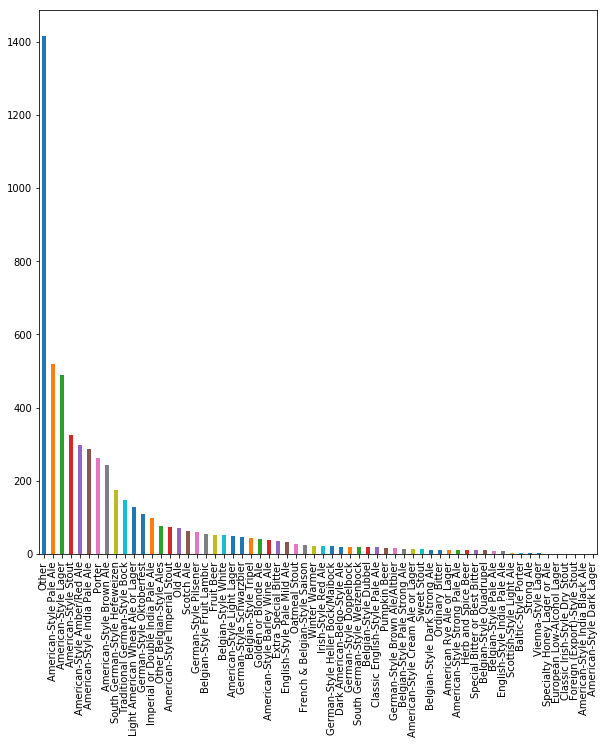

In [3]:
# Create a quick plot to check on the number of unique styles
# This revealed an really big disparity between the 'other' style and all others
df_beers.style_id.value_counts().plot(kind='bar', figsize = (10,10))

In [4]:
cat_dict = dict(df_beers.cat_id.value_counts())

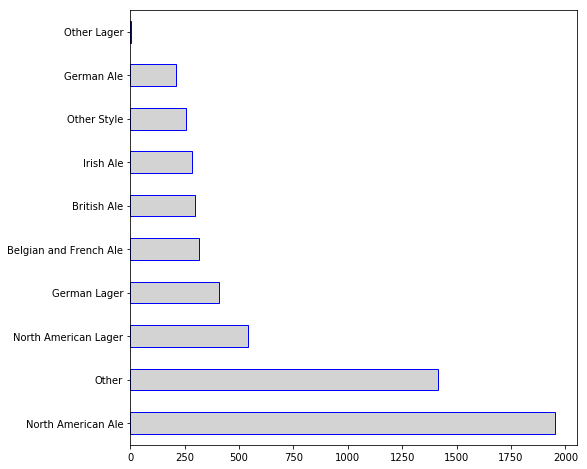

In [5]:
# Take a quick look at the number of categories represented in the dataset
df_beers.cat_id.value_counts().plot(kind='barh', figsize=(8,8), edgecolor='blue', color='lightgrey')

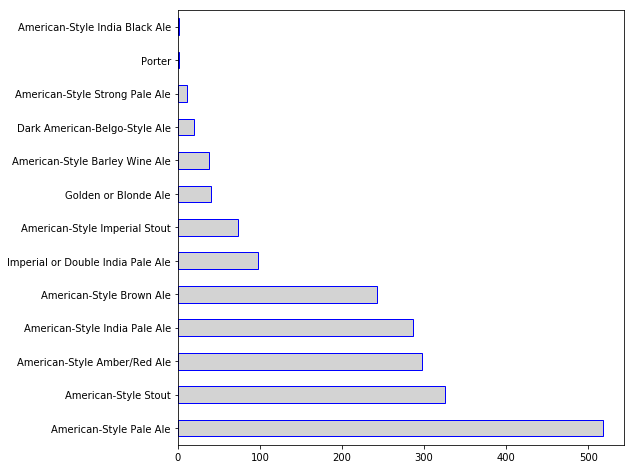

In [6]:
# Take a look at just styles, which fall under the categoy 'North American Ale'
df_beers[df_beers.cat_id == 'North American Ale'].style_id.value_counts().plot(kind='barh', figsize=(8,8), 
                                                                               edgecolor='blue', color='lightgrey')

In [7]:
# See how many beers fall into the 'Other' style
df_beers[df_beers.cat_id == 'Other'].shape

(1415, 8)

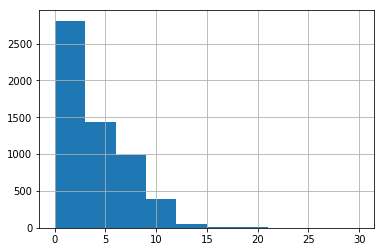

In [8]:
# Take a look at the distribution of ABV in the dataset
# This revealed highly skewed data indicative of a problem
df_beers.abv.hist(bins=10, range=(0,30))

In [9]:
# Take a look at why the ABV data is so skewed
# This reveals that a majority of the beers are listed at 0.00% ABV.
# This is an obvious error in need of correction
df_beers.abv.value_counts()

0.0      2807
5.0       242
6.0       139
5.5       129
8.0       126
4.5       106
5.2        97
4.8        94
9.0        93
6.5        88
7.0        87
10.0       87
5.3        80
7.5        77
4.9        66
5.6        65
5.1        63
5.8        62
8.5        59
4.7        57
5.4        57
4.6        44
5.7        43
7.2        42
5.9        42
6.2        42
4.0        41
9.5        38
6.8        36
4.3        30
         ... 
10.8        2
11.3        2
11.9        2
10.1        2
11.6        2
12.7        2
11.7        2
10.3        2
9.7         2
16.0        2
3.7         1
12.1        1
13.2        1
100.0       1
17.0        1
2.9         1
18.2        1
24.0        1
14.5        1
32.0        1
0.5         1
20.0        1
3.0         1
1.0         1
2.8         1
12.3        1
13.6        1
10.4        1
11.2        1
14.9        1
Name: abv, Length: 112, dtype: int64

In [10]:
# Another look at the error to see if it is limitted to just one style
# Spoilers - it isn't
df_beers[df_beers.abv == 0.0].style_id.value_counts()

Other                                811
American-Style Lager                 320
American-Style Pale Ale              314
American-Style Stout                 212
American-Style Amber/Red Ale         172
Porter                               153
American-Style Brown Ale             150
South German-Style Hefeweizen        107
American-Style India Pale Ale         95
Traditional German-Style Bock         77
German-Style Oktoberfest              71
Light American Wheat Ale or Lager     63
Belgian-Style Fruit Lambic            38
Old Ale                               25
English-Style Pale Mild Ale           25
German-Style Schwarzbier              21
Scotch Ale                            16
Fruit Beer                            16
German-Style Pilsener                 11
Belgian-Style White                   11
Irish-Style Red Ale                    9
Oatmeal Stout                          9
Imperial or Double India Pale Ale      7
Golden or Blonde Ale                   7
South German-Sty

In [11]:
# Do some aggregation to get the average ABV for each style
# Here, we're excluding the 0.00% ABV entries
df_beers[~(df_beers.abv == 0.0)].groupby('style_id').abv.mean()

style_id
American Rye Ale or Lager             6.540000
American-Style Amber/Red Ale          5.689600
American-Style Barley Wine Ale       10.411111
American-Style Brown Ale              5.556989
American-Style Cream Ale or Lager     5.557143
American-Style Dark Lager             4.500000
American-Style Imperial Stout        10.408333
American-Style India Black Ale        8.700000
American-Style India Pale Ale         6.540625
American-Style Lager                  5.154438
American-Style Light Lager            4.200000
American-Style Pale Ale               5.541176
American-Style Stout                  6.392982
American-Style Strong Pale Ale        8.645455
Baltic-Style Porter                   3.733333
Belgian-Style Dark Strong Ale        10.181818
Belgian-Style Dubbel                  7.063158
Belgian-Style Fruit Lambic            5.925000
Belgian-Style Pale Ale                6.044444
Belgian-Style Pale Strong Ale         8.514286
Belgian-Style Quadrupel              11.440000
Belg

In [12]:
# More aggregation this time with 0.00% included in the aggregate as a sanity check
df_beers.groupby('style_id').abv.mean()

style_id
American Rye Ale or Lager             5.945455
American-Style Amber/Red Ale          2.394613
American-Style Barley Wine Ale        9.863158
American-Style Brown Ale              2.126749
American-Style Cream Ale or Lager     2.992308
American-Style Dark Lager             4.500000
American-Style Imperial Stout        10.265753
American-Style India Black Ale        8.700000
American-Style India Pale Ale         4.375610
American-Style Lager                  1.781391
American-Style Light Lager            3.696000
American-Style Pale Ale               2.182239
American-Style Stout                  2.235583
American-Style Strong Pale Ale        8.645455
Baltic-Style Porter                   3.733333
Belgian-Style Dark Strong Ale         9.333333
Belgian-Style Dubbel                  7.063158
Belgian-Style Fruit Lambic            1.755556
Belgian-Style Pale Ale                6.044444
Belgian-Style Pale Strong Ale         8.514286
Belgian-Style Quadrupel              11.440000
Belg

In [13]:
# Another quick look to try and wrap my head around the issue
# This reveals where the 0.00% entries are
df_beers[df_beers.abv == 0].groupby('style_id').count()

,brewery_id,name,cat_id,abv,brewery_name,latitude,longitude
style_id,,,,,,,
American Rye Ale or Lager,1,1,1,1,1,1,1
American-Style Amber/Red Ale,172,172,172,172,172,172,172
American-Style Barley Wine Ale,2,2,2,2,2,2,2
American-Style Brown Ale,150,150,150,150,150,150,150
American-Style Cream Ale or Lager,6,6,6,6,6,6,6
American-Style Imperial Stout,1,1,1,1,1,1,1
American-Style India Pale Ale,95,95,95,95,95,95,95
American-Style Lager,320,320,320,320,320,320,320
American-Style Light Lager,6,6,6,6,6,6,6


In [14]:
# Finally - let's fix that erroneous data
# This for loop imputes average values for each style when there is a 0.00% ABV entry for that style

# Create an empty list to hold the new values
abv_list = []

# Create a for loop to iterate through the dataframe
for idx, val in enumerate(df_beers.abv):
    
    # if the ABV entry is 0.00%, impute an average
    if val == 0:
        style = df_beers.style_id[idx]
        
        # Below is the tricky logic of filtering the dataframe by style and ABV,
        # getting the average of that value, and assigning it to a variable
        avg = round(df_beers[(df_beers.style_id == style) & ~(df_beers.abv == 0) ].abv.mean(), 1)
        
        # This all_avg is the average ABV across the entire dataset (excluding 0.00% entries)
        # this is used for when a style only has 1 entry and that entry is 0.00% ABV
        all_avg = round(df_beers[~(df_beers.abv == 0)].abv.mean(), 1)
        
        # Check to see if a style has more than just a single 0.00% entry... 
        # if not, assign the overall average ABV, 
        # if so, assign the average ABV for that style
        if avg is None:
            abv_list.append(all_avg)
        else:
            abv_list.append(avg)
            
    # If the ABV entry isn't 0.00%, just keep the ABV listed        
    else:
        abv_list.append(df_beers.abv[idx])

# Check our work       
print(len(abv_list))
abv_list


5680


[5.8,
 7.6,
 8.2,
 8.0,
 7.0,
 6.0,
 6.8,
 5.2,
 5.2,
 5.8,
 3.6,
 5.0,
 5.5,
 7.2,
 5.9,
 5.2,
 5.5,
 5.0,
 9.8,
 5.0,
 6.0,
 5.2,
 5.9,
 5.9,
 5.5,
 5.5,
 6.8,
 6.6,
 8.0,
 10.0,
 6.0,
 9.2,
 11.3,
 7.5,
 4.8,
 5.0,
 nan,
 6.0,
 5.7,
 nan,
 6.0,
 4.8,
 7.8,
 4.2,
 5.2,
 5.0,
 nan,
 5.5,
 8.0,
 5.1,
 6.0,
 5.0,
 6.5,
 5.1,
 6.0,
 3.2,
 7.5,
 4.5,
 4.5,
 5.5,
 6.3,
 6.8,
 5.0,
 7.0,
 5.7,
 7.3,
 7.0,
 7.0,
 5.6,
 7.5,
 7.0,
 6.0,
 5.3,
 5.2,
 5.3,
 6.5,
 6.4,
 5.3,
 10.4,
 7.0,
 5.7,
 6.2,
 5.0,
 10.0,
 7.3,
 10.0,
 7.0,
 10.0,
 10.0,
 12.0,
 5.0,
 5.5,
 9.5,
 7.0,
 5.7,
 5.5,
 6.0,
 6.4,
 7.0,
 8.3,
 5.0,
 7.0,
 5.5,
 7.2,
 9.0,
 10.0,
 5.2,
 10.5,
 4.7,
 5.4,
 5.7,
 5.2,
 5.2,
 7.0,
 4.7,
 7.2,
 7.2,
 5.5,
 5.5,
 4.7,
 5.5,
 7.3,
 5.7,
 5.5,
 6.0,
 8.0,
 7.0,
 7.0,
 5.2,
 4.9,
 10.5,
 5.0,
 7.0,
 5.5,
 5.2,
 5.5,
 7.0,
 6.4,
 6.4,
 5.2,
 6.9,
 4.6,
 5.3,
 5.2,
 4.6,
 5.7,
 5.4,
 5.3,
 5.3,
 6.7,
 4.8,
 5.5,
 7.2,
 5.4,
 5.4,
 4.6,
 4.9,
 4.9,
 8.6,
 3.5,
 5.5,
 7.0,
 10.0,
 7.0,
 9.4

In [15]:
# Assign the new ABV list to a new column in the dataframe
df_beers['abvs'] = abv_list

In [16]:
# Fill any NAs in ABV column with the average ABV for the dataset (excluding 0.00% entries)
df_beers.abvs.fillna(value=round(df_beers[~(df_beers.abv == 0)].abv.mean(), 1), inplace=True)

# Check our work
df_beers.abvs.isna().sum()

0

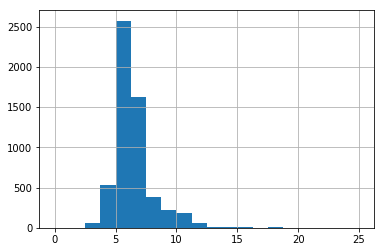

In [17]:
# Now check the distribution of ABV in the dataset again
# Spoilers - it looks WAY better now
df_beers.abvs.hist(bins=20, range=(0,25))

In [18]:
# Do another sanity check to see if there are beers with ridiculous ABV
# Spoilers - there are!
df_beers[df_beers.abvs > 20]

,brewery_id,name,cat_id,style_id,abv,brewery_name,latitude,longitude,abvs
657,157,Samuel Adams Utopias MMIV,Other,Other,24.0,Boston Beer Company,42.3144,-71.1034,24.0
915,241,Tactical Nuclear Penguin,North American Ale,American-Style Imperial Stout,32.0,BrewDog Ltd,57.6830,-2.0030,32.0
5603,1373,Norfolk Nog Old Dark Ale,British Ale,Old Ale,100.0,Woodforde's Norfolk Ales,52.6842,1.4490,100.0


In [19]:
# I didn't want to trash the beer with 100% ABV listed, so I gave it the average ABV for the dataset
# I could have looked up the value and input it directly - but ... I didn't
df_beers.loc[5603, 'abvs'] = round(df_beers[~(df_beers.abv == 0)].abv.mean(), 1)

# Spoiler!!

### Though I did all that work above, I didn't use ANY of it in my final presentation.  Another dataset was used that provided better information as it was a HUGE (1.58million) entries. You'll see that later.

In [20]:
# read in a table that contains tax data for craft beer
df_tax = pd.read_csv('./data/tax.csv')

In [21]:
# Take that table and transpose it so that I can work with some time series
# Assign that to a new dataframe df2_tax
df2_tax = df_tax.set_index('STATE').T

In [22]:
# Create a new column that contains the average tax for all 50 states for each year
df2_tax['avg'] = df2_tax.mean(axis=1)

In [23]:
# Check our work
df2_tax    

STATE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,avg
1/1/2007,2415.76,658.60,1246.00,15668.09,63557.26,48316.88,2993.33,2905.21,2396.49,8376.90,...,10370.86,7133.91,6300.55,11810.66,3489.62,19697.39,15433.97,865.02,322.24,9193.727200
1/1/2008,2067.69,723.53,1328.35,14857.81,61172.74,48528.59,2205.67,2957.74,2005.33,7078.61,...,12092.40,9670.24,6446.05,11976.19,3486.81,17195.23,14919.93,608.65,2135.61,9342.961400
1/1/2009,2263.65,238.60,1279.34,15640.69,54504.99,49895.79,2075.57,2948.61,2205.38,6426.66,...,11977.06,9814.02,5941.77,12379.87,3587.06,17651.64,14700.40,78.00,2518.90,9175.783529
1/1/2010,1929.15,161.24,1331.85,16800.24,58276.38,50584.87,1988.38,3574.26,2308.99,7554.46,...,13633.63,10556.49,5226.60,12732.37,3661.94,19965.32,16669.97,7.16,2681.61,10071.017647
1/1/2011,2251.02,0.00,1124.98,19897.83,65069.70,60811.37,2530.80,1676.54,2541.38,6761.68,...,9702.23,10299.17,5238.62,12098.41,3263.23,18205.29,19882.13,0.00,3178.55,10766.021373
1/1/2012,2312.43,46.50,1265.93,19165.96,64239.95,57966.73,1876.05,1572.75,2718.28,6817.80,...,10103.13,8503.31,4595.18,10414.51,2216.50,17362.29,18853.61,14.85,3528.21,10802.017451
1/1/2013,2155.60,130.55,558.14,18763.52,60559.56,60133.43,1770.05,2250.90,2868.28,6440.29,...,9965.75,9242.60,3953.10,12450.88,2563.85,17770.87,19250.29,422.15,3544.63,11271.777255
1/1/2014,2114.97,226.25,657.12,17173.00,65035.40,72839.26,1447.60,4504.30,2771.70,6585.28,...,9220.38,9471.81,5875.72,12352.47,2692.34,18066.36,17885.54,420.50,3133.63,13103.613137
1/1/2015,4511.48,6109.99,1609.38,29869.10,124974.70,121814.79,13218.19,7207.31,5865.02,38265.32,...,18757.66,62757.74,4302.44,36003.33,10792.93,45357.11,34649.49,3653.33,5403.20,25018.059608
1/1/2016,13315.93,23810.78,6091.89,41613.95,201066.01,141312.55,10705.61,8969.72,7647.56,88092.72,...,35673.47,101466.52,6283.83,68666.78,13299.51,78538.88,55487.79,6766.41,14370.22,39492.651176


In [24]:
# Calculate Year over Year change using pct_change.
# pct_change is a much easier method than trying to do this with embedded for loops
# and it is quicker
# Ask me how I know...
df2_pct_change = df2_tax.pct_change()

# Check our work
# You'll notice some 'inf' entries...
# This is due to a division by zero error where there was a 0.00 entry for a given year.
# I chose to just ignore these 'inf' entries as they didn't have a significant impact on EDA
# I could have imputed average values to clean this up.
# I didn't. I'm lazy.
df2_pct_change

STATE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,avg
1/1/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/1/2008,-0.144083,0.098588,0.066091,-0.051715,-0.037518,0.004382,-0.263138,0.018081,-0.163222,-0.154985,...,0.165998,0.355532,0.023093,0.014015,-0.000805,-0.127030,-0.033306,-0.296375,5.627390,0.016232
1/1/2009,0.094772,-0.670228,-0.036895,0.052691,-0.108999,0.028173,-0.058984,-0.003087,0.099759,-0.092101,...,-0.009538,0.014868,-0.078231,0.033707,0.028751,0.026543,-0.014714,-0.871848,0.179476,-0.017893
1/1/2010,-0.147770,-0.324225,0.041045,0.074137,0.069193,0.013810,-0.042008,0.212185,0.046981,0.175488,...,0.138312,0.075654,-0.120363,0.028474,0.020875,0.131075,0.133981,-0.908205,0.064596,0.097565
1/1/2011,0.166846,-1.000000,-0.155325,0.184378,0.116571,0.202165,0.272795,-0.530941,0.100646,-0.104942,...,-0.288360,-0.024376,0.002300,-0.049791,-0.108879,-0.088154,0.192691,-1.000000,0.185314,0.069010
1/1/2012,0.027281,inf,0.125291,-0.036781,-0.012752,-0.046778,-0.258713,-0.061907,0.069608,0.008300,...,0.041320,-0.174369,-0.122826,-0.139184,-0.320765,-0.046305,-0.051731,inf,0.110006,0.003343
1/1/2013,-0.067820,1.807527,-0.559107,-0.020998,-0.057291,0.037378,-0.056502,0.431187,0.055182,-0.055371,...,-0.013598,0.086941,-0.139729,0.195532,0.156711,0.023533,0.021040,27.427609,0.004654,0.043488
1/1/2014,-0.018849,0.733052,0.177339,-0.084767,0.073908,0.211294,-0.182170,1.001111,-0.033672,0.022513,...,-0.074793,0.024799,0.486358,-0.007904,0.050116,0.016628,-0.070895,-0.003909,-0.115950,0.162515
1/1/2015,1.133118,26.005481,1.449142,0.739306,0.921641,0.672378,8.131107,0.600095,1.116037,4.810735,...,1.034370,5.625739,-0.267760,1.914666,3.008754,1.510584,0.937291,7.688062,0.724262,0.909249
1/1/2016,1.951566,2.897024,2.785240,0.393211,0.608854,0.160061,-0.190085,0.244531,0.303927,1.302156,...,0.901808,0.616797,0.460527,0.907234,0.232243,0.731567,0.601403,0.852121,1.659576,0.578566


In [25]:
# Output the two new tables to csv files for future visualization
df2_tax.to_csv('./tableau_tables/df2_tax.csv')
df2_pct_change.to_csv('./tableau_tables/df2_pct_change.csv')

# FINALLY SOME VISUALIZATION!

## After the wrangling above, I'm ready to get down to plotting

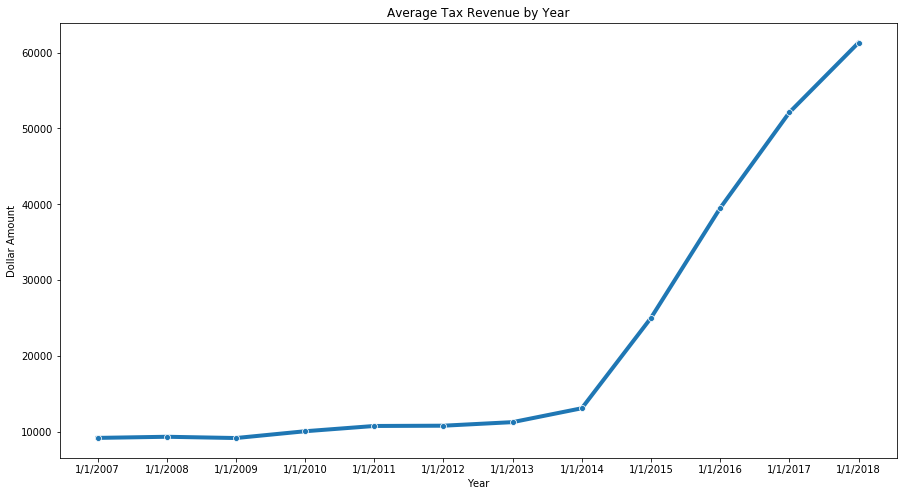

In [26]:
# A quick line plot of tax revenue growth over time
# This look pretty impressive with SOME slight slowing apparent in 2017-2018
sns.lineplot(x=df2_tax.index, y='avg', marker="o", lw='4', data=df2_tax)
plt.title('Average Tax Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Dollar Amount')
plt.gcf().set_size_inches(15, 8)
plt.savefig('./plots/tax_revenue.png', transparent=True, bbox_inches='tight')
plt.show()

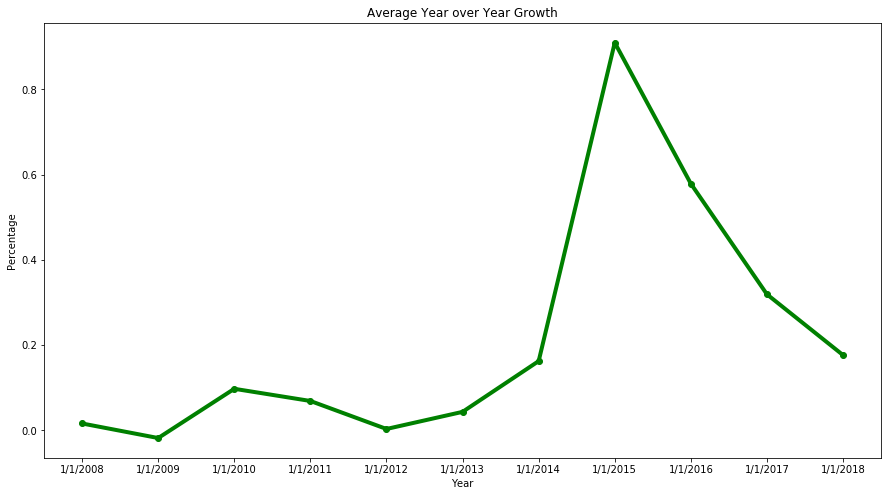

In [27]:
# Plot a line showing Year over Year change ... over time
# This plot revealed a hidden potential 'bubble' burst in 2015-2016
# that was not apparent by simply plotting tax revenue over time
plt.plot(df2_pct_change.index, df2_pct_change.avg, color='green', marker="o", lw='4')
plt.title('Average Year over Year Growth')
plt.xlabel('Year')
plt.ylabel('Percentage')

# the plt.gcf() entry was necessary because, for whatever reason, figsize wasn't working 
# with matplotlib... sometimes Jupyter Notebook can be weird like that
plt.gcf().set_size_inches(15,8)
plt.savefig('./plots/tax_yoy.png', transparent=True, bbox_inches='tight')
plt.show()

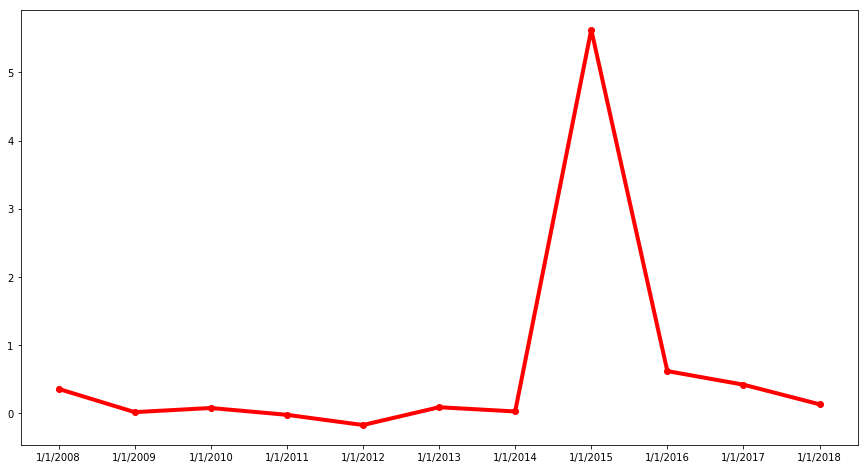

In [28]:
# Do a check for Year over Year change for Texas, because
# based on other EDA (later) Texas is a good state for building a new brewery.
plt.plot(df2_pct_change.index, df2_pct_change.TX, color='red', marker='o', lw='4')
plt.gcf().set_size_inches(15,8)
plt.savefig('./plots/tax_yoy.png', transparent=True, bbox_inches='tight')
plt.show()

In [29]:
# These below are sanity checks. 
# I wanted to make sure I could get the mean for a single column using this syntax.
# I could. 
print(df2_tax.AK.mean(), df2_pct_change.AK.mean())

6827.6675 0.3737773446052986


In [30]:
# Since the above worked, I want to do that for each column individually
# Create a list of column names as well as two empty 'holder' lists that will be used in the for loop.
cols_list = list(df2_tax.columns)[0:51]
avg_tax_list = []
avg_pct_list = []

# Loop through the columns and find the mean from both the normal tax revenue data frame
# as well as the Year over Year change dataframe
for i in cols_list:
    avg_tax_list.append(round(df2_tax[i].mean(), 2))
    avg_pct_list.append(round((df2_pct_change[i].mean()*100), 2))

# Create two new dictionaries based on the lists of averages created above. 
# These will be used for creating new dataframes and plotting
tax_dict = dict(zip(cols_list, avg_tax_list))
pct_dict = dict(zip(cols_list, avg_pct_list))

# check our work
tax_dict

{'AK': 6827.67,
 'AL': 8582.11,
 'AR': 4590.39,
 'AZ': 25157.0,
 'CA': 122637.28,
 'CO': 87650.72,
 'CT': 7454.18,
 'DC': 4974.26,
 'DE': 4699.95,
 'FL': 36978.33,
 'GA': 15293.33,
 'HI': 3790.23,
 'IA': 18579.88,
 'ID': 6567.97,
 'IL': 49440.77,
 'IN': 20982.29,
 'KS': 8329.98,
 'KY': 10097.65,
 'LA': 5783.03,
 'MA': 27370.2,
 'MD': 13295.6,
 'ME': 15090.66,
 'MI': 50382.27,
 'MN': 25908.89,
 'MO': 17903.51,
 'MS': 3251.96,
 'MT': 13113.67,
 'NC': 50342.01,
 'ND': 2005.8,
 'NE': 8199.61,
 'NH': 11157.25,
 'NJ': 17386.34,
 'NM': 13140.94,
 'NV': 16042.02,
 'NY': 36394.31,
 'OH': 28050.03,
 'OK': 5741.71,
 'OR': 56405.67,
 'PA': 38979.68,
 'RI': 2964.41,
 'SC': 11241.32,
 'SD': 2348.05,
 'TN': 19835.0,
 'TX': 45445.25,
 'UT': 6059.1,
 'VA': 36204.9,
 'VT': 7466.9,
 'WA': 40774.06,
 'WI': 30705.7,
 'WV': 2358.88,
 'WY': 6944.11}

In [31]:
# Turn that list into a dataframe
df_avg_tax = pd.DataFrame(avg_tax_list, index=cols_list, columns=['average_tax'])

# RESET YOUR INDEX. No... Seriously. RESET YOUR INDEX!!!
df_avg_tax.reset_index(inplace=True)

# Sort the values now (not later)
df_avg_tax.sort_values('average_tax', inplace=True, ascending=False)

# Rename the column inconveniently called index to 'state'
df_avg_tax.rename(columns={'index':'state'}, inplace=True)

# Check our work
df_avg_tax.head()

,state,average_tax
4,CA,122637.28
5,CO,87650.72
37,OR,56405.67
22,MI,50382.27
27,NC,50342.01


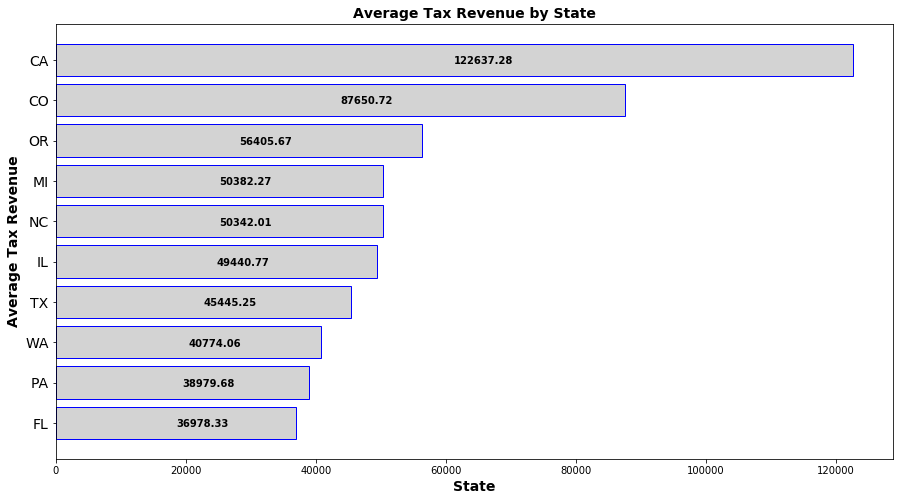

In [32]:
# There are many ways to make a plot. This one is mine.
# This is a bar graph showing the top 10 states by Average Tax Revenue

# This step is 100% not needed, but I did it anyway because matplotlib was acting strange for a bit
# I assigned the top 10 states to a new list and used that for plotting
avg_tax = list(df_avg_tax.average_tax.head(10))

# Create the bar plot with some nice color
plt.barh(df_avg_tax.state.head(10), avg_tax, edgecolor='blue', color='lightgrey')

# Add words and stuff
plt.title('Average Tax Revenue by State', fontsize='14', fontweight='bold')
plt.xlabel('State', fontsize='14', fontweight='bold')
plt.ylabel('Average Tax Revenue', fontsize='14', fontweight='bold')
plt.yticks(fontsize='14')

# Add labels to the bars
for i, v in enumerate(df_avg_tax.average_tax.head(10)):
    plt.text(v/2, i+.1, str(v), color='black', fontweight='bold')
    
# Why isn't figsize working? I have no clue, but gcf() works
plt.gcf().set_size_inches(15, 8)
# Invert the y-axis, otherwise the values will be upsidedown... weird but true
plt.gca().invert_yaxis()

# Save the plot to a file
plt.savefig('./plots/avg_tax.png', transparent=True, bbox_inches='tight')
plt.show()

In [33]:
# Second verse, same as the first - this time just with the Year over Year data 
df_avg_pct = pd.DataFrame(avg_pct_list, index=cols_list, columns=['average_percent'])

# RESET YOUR INDEX. Really. I mean it this time. Don't forget. RESET YOUR INDEX
df_avg_pct.reset_index(inplace=True)

# Sort your values now
df_avg_pct.sort_values('average_percent', inplace=True, ascending=False)

# Rename that pesky 'index' column
df_avg_pct.rename(columns={'index':'state'}, inplace=True)

# Drop rows with 'inf' averages due to divide be zero errors discussed earlier.
df_avg_pct.drop([25,1,49], inplace=True)

# Check our work
df_avg_pct.head()

,state,average_percent
26,MT,139.42
50,WY,80.87
6,CT,78.36
43,TX,64.99
9,FL,58.50


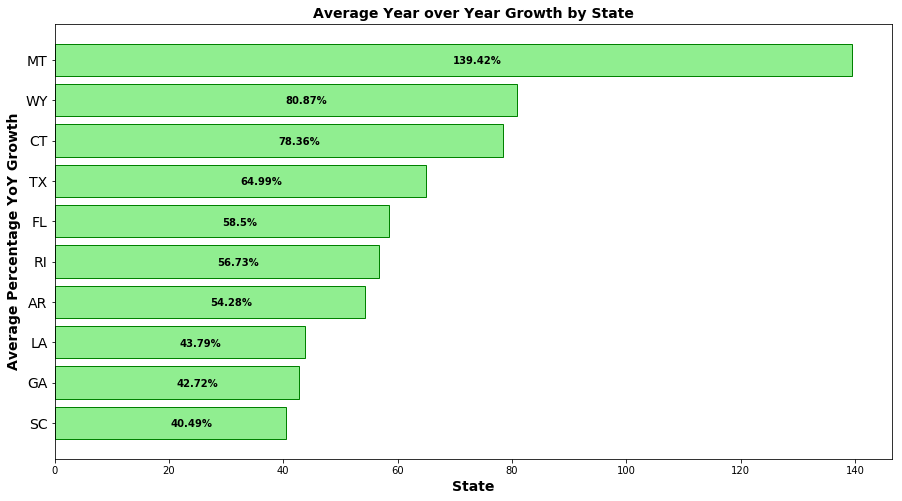

In [34]:
# Same with other plot(s).
avg_pct = list(df_avg_pct.average_percent.head(10))
plt.barh(df_avg_pct.state.head(10), avg_pct, edgecolor='green', color='lightgreen')

plt.title('Average Year over Year Growth by State', fontsize='14', fontweight='bold')
plt.xlabel('State', fontsize='14', fontweight='bold')
plt.yticks(fontsize='14')
plt.ylabel('Average Percentage YoY Growth', fontsize='14', fontweight='bold')

for i, v in enumerate(df_avg_pct.average_percent.head(10)):
    plt.text(v/2, i+.1, str(v)+'%', color='black', fontweight='bold')

plt.gcf().set_size_inches(15, 8)
plt.gca().invert_yaxis()

plt.savefig('./plots/avg_pct.png', transparent=True, bbox_inches='tight')
plt.show()

In [41]:
# This particular change is so that I can look at some of the data after an identified 'bubble burst'
# I'm taking only the last 4 years of data by slicing the dataframe. I'm assigning that to a new dataframe.
df3 = df2_pct_change[8:12].T

# I don't need the 'avg' in this dataframe (yet)
df3.drop('avg', inplace=True)

# create a NEW average and assign it to a new avg column
df3['avg'] = df3.mean(axis=1)

# Sort the values out
df3.sort_values('avg', inplace=True, ascending=False)

# Drop Mississippi as it has an 'inf' value that is skewing data
df3.drop('MS', inplace=True)

# reset the index... this is an important step when creating dataframes from slices of other dataframes
# I always forget this step
# DO NOT FORGET TO RESET THE INDEX!
# especially after dropping rows....
# Ask me how I know...
df3.reset_index(inplace=True)

# Check all our work
df3.head(10)

,STATE,1/1/2015,1/1/2016,1/1/2017,1/1/2018,avg
0,AL,26.005481,2.897024,0.224679,0.430654,7.389459
1,CT,8.131107,-0.190085,1.033238,0.234520,2.302195
2,WV,7.688062,0.852121,0.214532,-0.117488,2.159307
3,TX,5.625739,0.616797,0.418003,0.129744,1.697571
4,FL,4.810735,1.302156,0.391911,0.131350,1.659038
5,AR,1.449142,2.785240,1.206409,0.871147,1.577984
6,RI,-0.025721,4.490964,0.304921,1.274528,1.511173
7,LA,2.950693,0.519328,0.735389,0.496771,1.175545
8,SC,2.617376,1.662645,0.021134,0.236373,1.134382
9,GA,3.043196,0.704169,0.685947,0.007137,1.110112


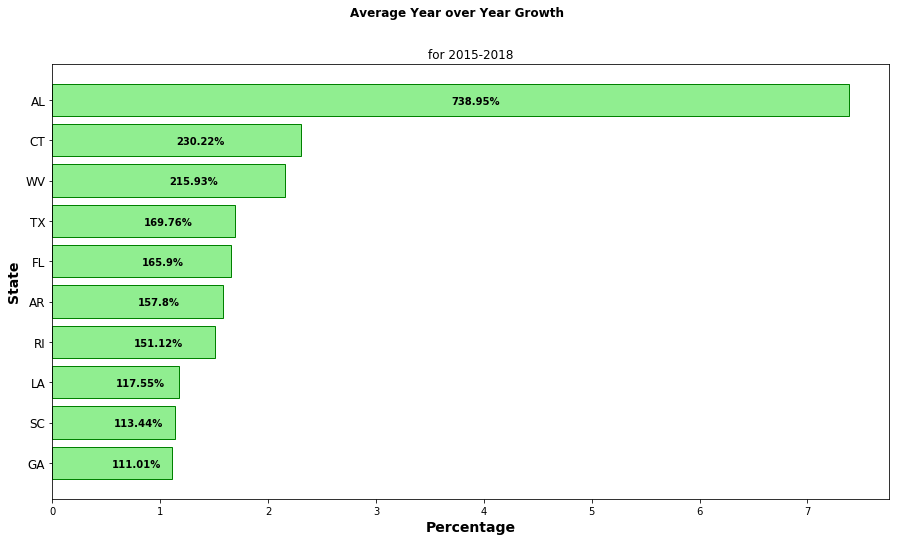

In [42]:
# Plot the plots....
states = list(df3.STATE.head(10))
vals = list(df3.avg.head(10))

plt.barh(states, vals, edgecolor='green', color='lightgreen')

# Format the plots
plt.suptitle('Average Year over Year Growth', fontweight='bold')
plt.title('for 2015-2018')
plt.xlabel('Percentage', fontsize='14', fontweight='bold')
plt.ylabel('State', fontsize='14', fontweight='bold')
plt.yticks(fontsize='12')

# Label the plots
for i, v in enumerate(vals):
    plt.text(v/2, i+.1, str(round(v*100,2))+'%', color='black', fontweight='bold')

# Format the plots some more
plt.gcf().set_size_inches(15,8)
plt.gca().invert_yaxis()

# Save the output
plt.savefig('./plots/tax_yoy_3.png', transparent=True, bbox_inches='tight')
plt.show()

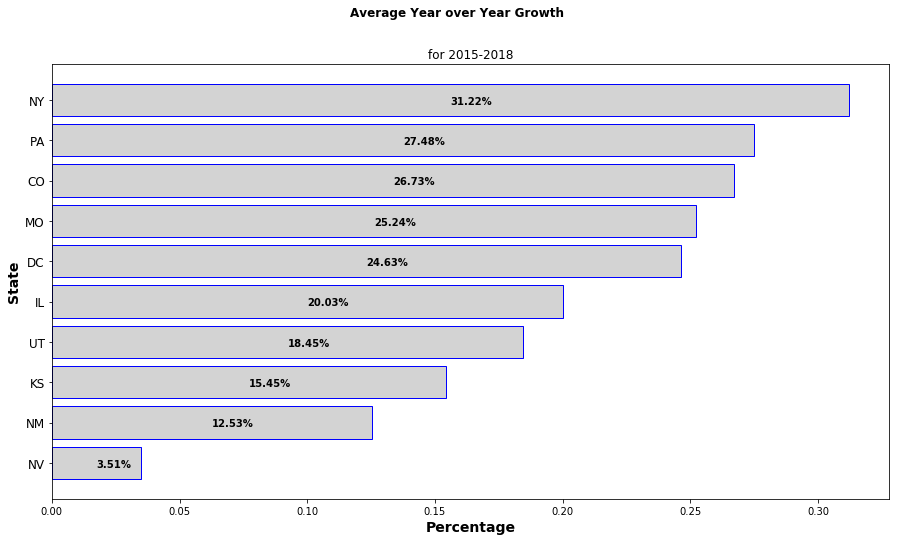

In [44]:
# Plot the pl... wait, I really should have made a function for this
# ...
# ... 
# Too late, let's just press on
states = list(df3.STATE.tail(10))
vals = list(df3.avg.tail(10))

plt.barh(states, vals, edgecolor='blue', color='lightgrey')

plt.suptitle('Average Year over Year Growth', fontweight='bold')
plt.title('for 2015-2018')
plt.xlabel('Percentage', fontsize='14', fontweight='bold')
plt.ylabel('State', fontsize='14', fontweight='bold')
plt.yticks(fontsize='12')

for i, v in enumerate(vals):
    plt.text(v/2, i+.1, str(round(v*100,2))+'%', color='black', fontweight='bold')
    
plt.gcf().set_size_inches(15,8)
plt.gca().invert_yaxis()

plt.savefig('./plots/tax_yoy_bottom.png', transparent=True, bbox_inches='tight')
plt.show()

# Data Visualization (part 1) done. On to Data_Viz_2 notebook for more EDA fun.